# Статистика и Регрессия

Импортирование Библиотек для работ с ними в дальнейшем

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Распокоука, Чтение и Ознакомление с Базой Данных

In [ ]:
!unzip spotify-misic.zip

Archive:  spotify-misic.zip
replace Popular_Spotify_Songs.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Popular_Spotify_Songs.csv  


In [ ]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin-1')

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Здесь мы с помощью Статистики получаем Самые... Треки

In [ ]:
more_artists = df[
    df['artist_count'] == df['artist_count'].max()
]['track_name'].values[0]
print(f'The Music with the biggest amount of artists is {more_artists}')

The Music with the biggest amount of artists is Los del Espacio


<center>
<img src="https://i.scdn.co/image/ab67616d00001e0252a52eac3761e2133bd0f57a" />
</center>

In [ ]:
much_bpm = df[
    df['bpm'] == df['bpm'].max()
]['track_name'].values[0]
print(f'The Music with the biggest amount of bmp is {much_bpm}')

The Music with the biggest amount of bmp is Lover


<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTt65ej3Dt1HsHOGwrbBhSIl_Cs75vHegMtigT-rODtbQ&s" />
</center>

In [ ]:
the_happiest_music = df[
    df['valence_%'] == df['valence_%'].max()
]['track_name'].values[0]
the_happiest_music_valence = df[
    df['valence_%'] == df['valence_%'].max()
]['valence_%'].values[0]
print(f'The Music with the biggest amount of valence is {the_happiest_music} with {the_happiest_music_valence}')

The Music with the biggest amount of valence is Zona De Perigo with 97


<center>
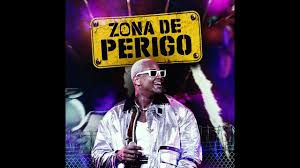
</center>

In [ ]:
the_energiest_music = df[
    df['energy_%'] == df['energy_%'].max()
]['track_name'].values[0]
the_energiest_music_energy = df[
    df['energy_%'] == df['energy_%'].max()
]['valence_%'].values[0]
print(f'The Music with the biggest amount of valence is {the_energiest_music} with {the_energiest_music_energy}')

The Music with the biggest amount of valence is I'm Good (Blue) with 38


<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYvnQsW3lL5OfSlSUsnx9TVZ23FMJN643Rjtu-gKjYVA&s" />
</center>

In [ ]:
the_speechiness_music = df[
    df['speechiness_%'] == df['speechiness_%'].max()
]['track_name'].values[0]
the_speechiness_musicc_energy = df[
    df['speechiness_%'] == df['speechiness_%'].max()
]['artist(s)_name'].values[0]
print(f'The Music with the biggest amount of speech is {the_speechiness_music} with {the_speechiness_musicc_energy}%')

The Music with the biggest amount of speech is Cartï¿½ï¿½o B with MC Caverinha, KayBlack%


<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7ULEmP9gNKb8f88XtPSFvTfcRY1ryMQc2d1ahbhg26A&s" />
</center>

Теперь мы создаем Гафики с помощью Различных Данных.

Научно Доказано что так Информация Воспринимается Лучше

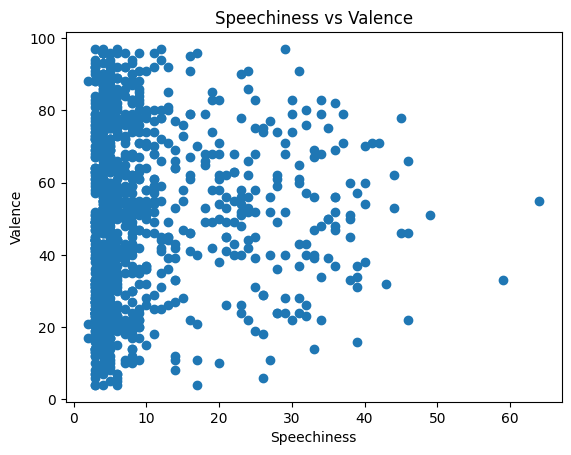

In [ ]:
plt.scatter(df['speechiness_%'], df['valence_%'])
plt.xlabel('Speechiness')
plt.ylabel('Valence')
plt.title('Speechiness vs Valence')
plt.show()

Существуют ли Люди которые не Любят Пироги?

In [ ]:
artist_count = df['artist_count'].value_counts().sort_index()

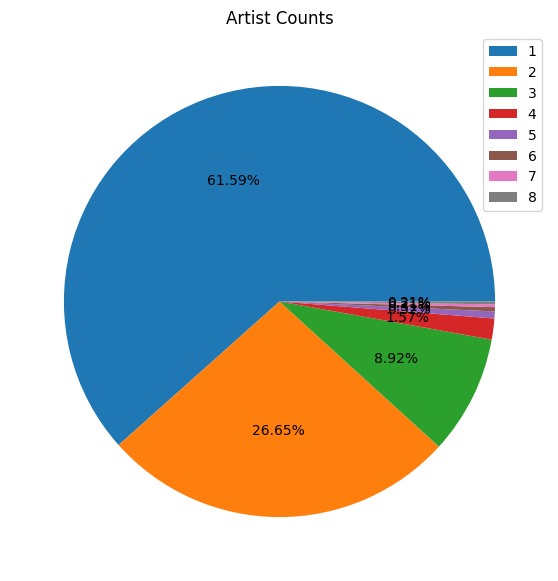

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(artist_count,
        autopct=lambda pct: f'{round(pct, 2)}%')
plt.title('Artist Counts')
plt.legend(artist_count.index)
plt.show()

In [ ]:
released_year = df['released_year'].value_counts().sort_index()

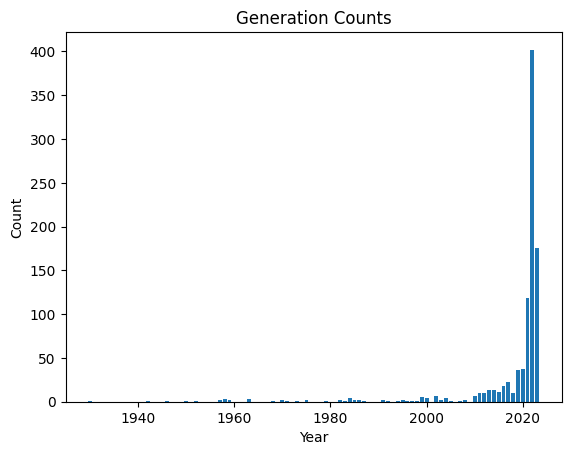

In [ ]:
plt.bar(released_year.index , released_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Generation Counts')
plt.show()

Отношение Быстроты Песни и Танцевальность

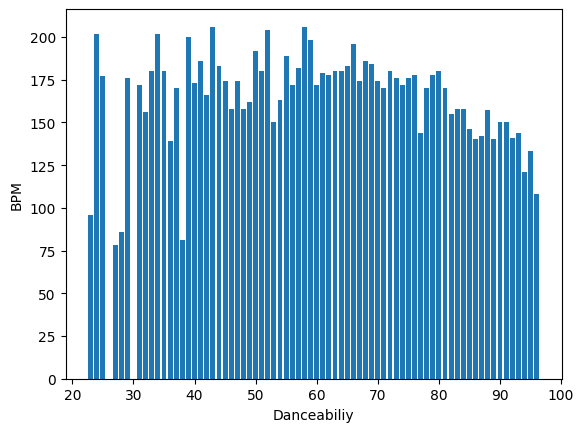

In [ ]:
plt.bar(df['danceability_%'], df['bpm'])
plt.xlabel('Danceabiliy')
plt.ylabel('BPM')
plt.show()

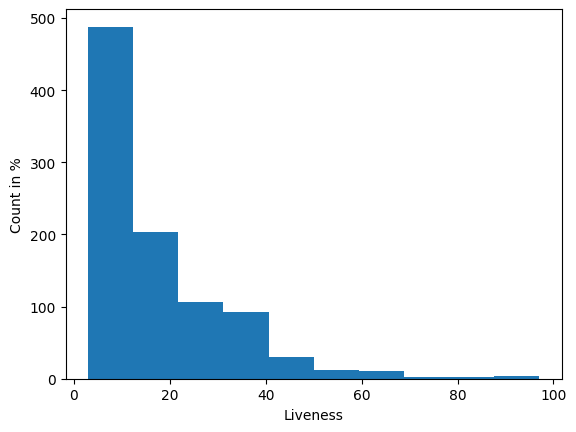

In [ ]:
plt.hist(df['liveness_%'])
plt.xlabel('Liveness')
plt.ylabel('Count in %')
plt.show()

Сможете Понять График?

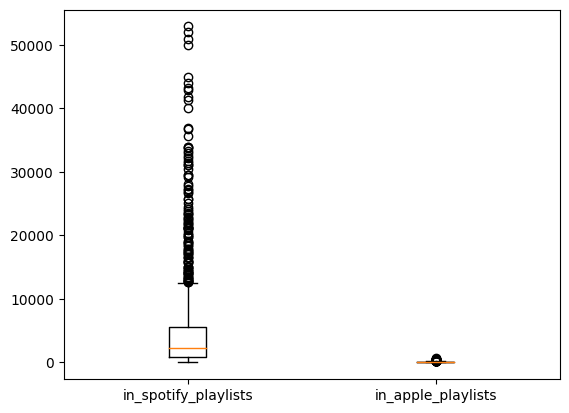

In [ ]:
plt.boxplot(df[['in_spotify_playlists', 'in_apple_playlists']])
plt.xticks(np.arange(1, 3), ['in_spotify_playlists', 'in_apple_playlists'])
plt.show()

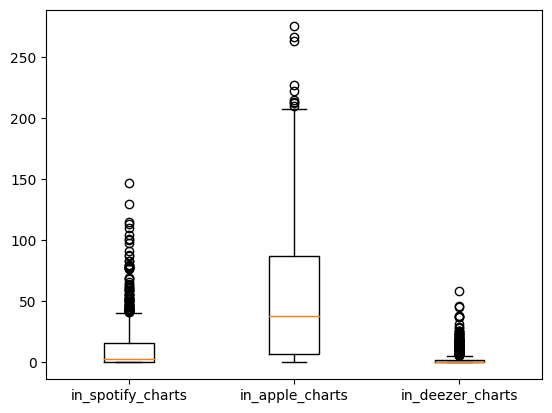

In [ ]:
plt.boxplot(df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']])
plt.xticks(np.arange(1, 4), ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'])
plt.show()

# Регрессия - Полиномиальная

Импортирование Библиотек для работ с ними в дальнейшем

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Распокоука, Чтение и Ознакомление с Базой Данных

In [ ]:
!unzip house-prices-advanced-regression-techniques -d house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: house-prices-advanced-regression-techniques/test.csv  
  inflating: house-prices-advanced-regression-techniques/train.csv  


In [ ]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col='Id')

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Создаем Переменную для Числовых Колонок

In [ ]:
df = df.select_dtypes(include=np.number)

Создаем Пайплайн

In [ ]:
def get_pipeline(n):
  pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy='mean')),
      ('pf', PolynomialFeatures(degree=n)),
      ('model', LinearRegression())
  ])
  return pipeline

Указываем Степень для Полиномиальной Регрессии

In [ ]:
pf = PolynomialFeatures(degree=2)

Фитим и Трансформируем Модельку

In [ ]:
pf.fit_transform(SimpleImputer(strategy='mean').fit_transform(df)).shape

(1460, 741)

Разделяем Даннные на Иксы и Игрики, а затем на Тестовые и Тренировочные

In [ ]:
X = df[df.columns[:-1]]
y = df['SalePrice']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
for i in range(1, 4):
  pipeline = get_pipeline(i)
  pipeline.fit(x_train, y_train)
  y_predicted = pipeline.predict(x_test)
  print(f'{i} = {mean_squared_error(y_test, y_predicted)}')

1 = 795128003.3935702
2 = 46493653395.484146
3 = 8448390890900.351


# Регрессия - Линейная

Импортирование Библиотек для работ с ними в дальнейшем

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

Распокоука, Чтение и Ознакомление с Базой Данных

In [102]:
!unzip archive.zip

Archive:  archive.zip
  inflating: pokemon.csv             


In [103]:
df = pd.read_csv('pokemon.csv')

In [104]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [106]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


Выбираем Сильно Коррелирующие Колонки, чтобы Создать Линейную Регрессию

In [107]:
corr = df.corr(numeric_only=True)

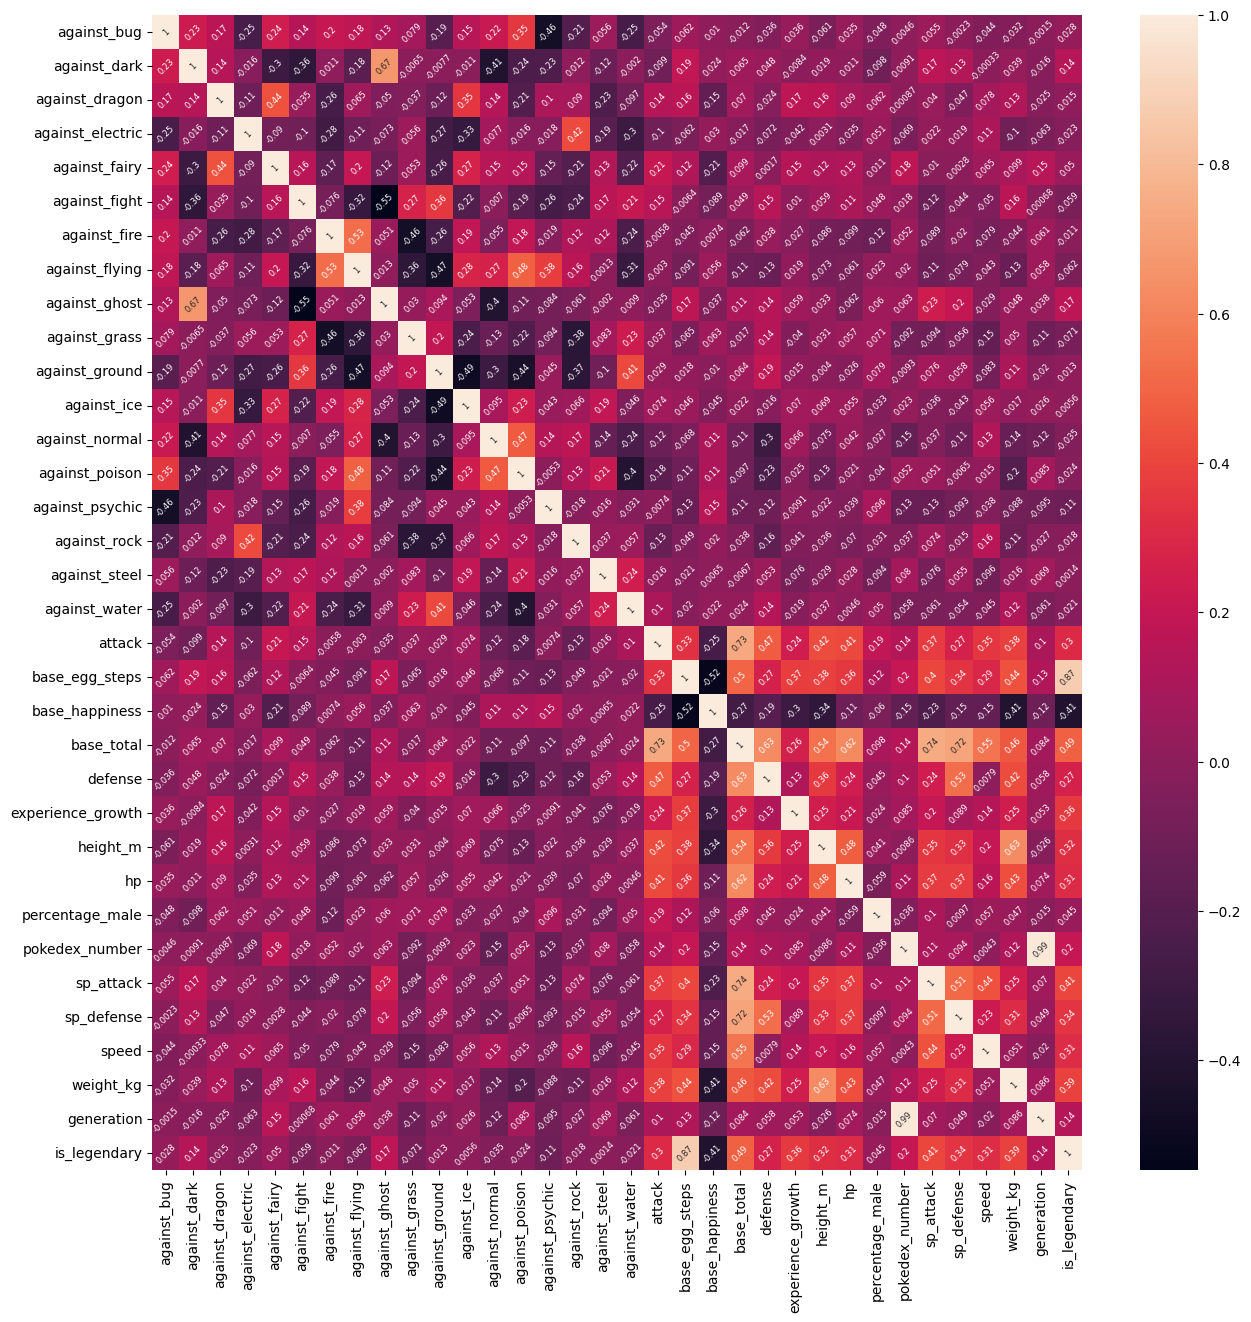

In [108]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={
        'size': 6,
        'rotation': 45
    }
)
plt.show()

Выбираем 2 сильно Коррелирующие Колонки, и с ними Запускаем нашу Модельку с Линейной Регрессией

In [109]:
X = df['pokedex_number']
y = df['generation']

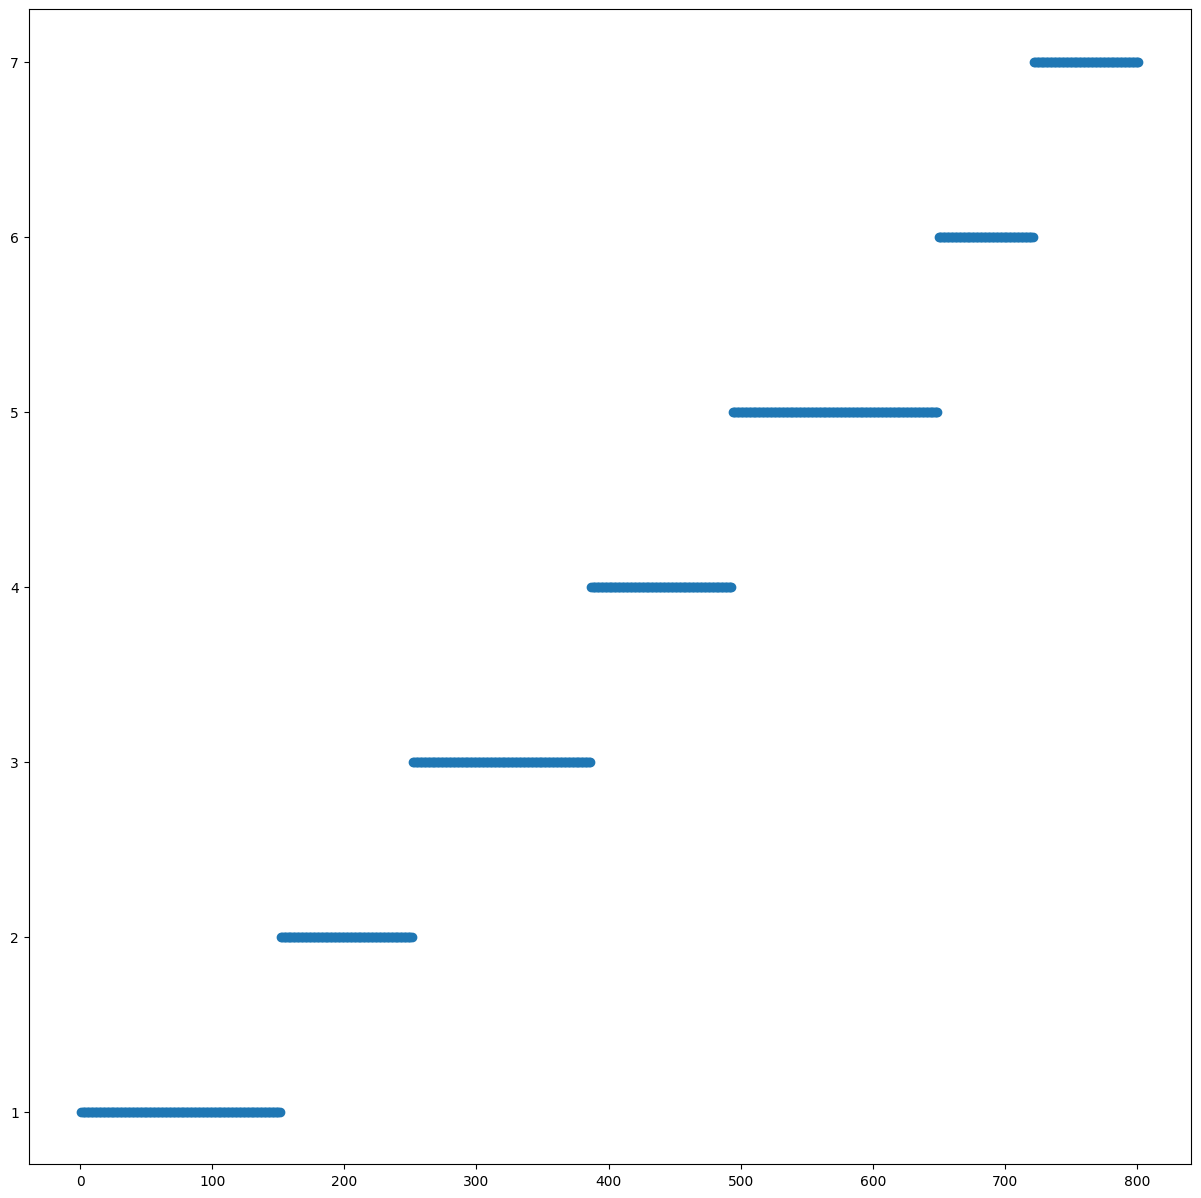

In [110]:
plt.figure(figsize=(15, 15))
plt.scatter(X, y)
plt.show()

In [112]:
X = X.values.reshape(-1, 1)

In [113]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Оцениваем Коэффициент для Задачи Линейной Регрессии и Интерсептируем Модельку

In [114]:
model.coef_

array([0.00822571])

In [115]:
model.intercept_

0.39187578027465664

Предсказываем Игрик по Иксу, а затем Видим наше Предсказанье на Графике

In [117]:
y_predicted = model.predict(X)

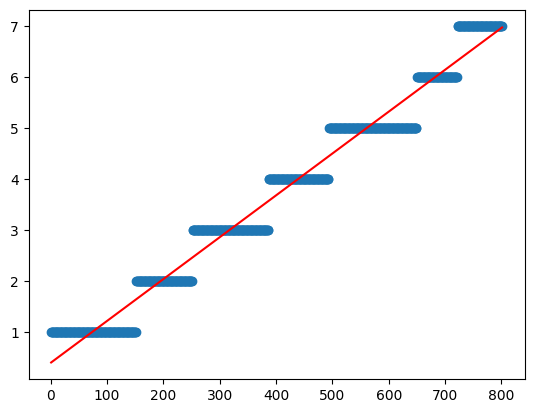

In [119]:
plt.scatter(X, y)
plt.plot(X, y_predicted, color='red')
plt.show()